## Import libraries

In [97]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from colorama import Fore, Back, Style 
color = Fore.YELLOW

## Import data

In [98]:
# get books dataframe
b_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
books_df = pd.read_csv('Data/Book reviews/BX_Books.csv', sep=';', names = b_cols , encoding='latin-1',low_memory=False)
books_df = books_df.drop(books_df.index[0])

# About data
print(f'{color}Head of books dataframe:')
books_df.head(5)
print(f'{color}\nBooks dataframe description: ')
books_df.describe()
print(f'\n{color}Data type of each colum: ')
books_df.dtypes

Head of books dataframe:


,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
5,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...



Books dataframe description: 


,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
count,271379,271379,271378,271379,271377,271379,271379,271379
unique,271379,242154,102028,116,16806,271063,271063,271063
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/226401654X.0...,http://images.amazon.com/images/P/226401654X.0...,http://images.amazon.com/images/P/226401654X.0...
freq,1,27,632,17628,7536,2,2,2



Data type of each colum: 


isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
img_s                  object
img_m                  object
img_l                  object
dtype: object

In [99]:
# get users dataframe
u_cols = ['user_id', 'location', 'age']
users_df = pd.read_csv('Data/Book reviews/BX-Users.csv', sep=';',names = u_cols,encoding='latin-1',low_memory=False)
users_df = users_df.drop(users_df.index[0])

# About data
print(f'{color}Head of users dataframe:')
users_df.head(5)
print(f'{color}\nUsers dataframe description: ')
users_df.describe()
print(f'\n{color}Data type of each colum: ')
users_df.dtypes


Head of users dataframe:


,user_id,location,age
1,1,"nyc, new york, usa",NaN
2,2,"stockton, california, usa",18
3,3,"moscow, yukon territory, russia",NaN
4,4,"porto, v.n.gaia, portugal",17
5,5,"farnborough, hants, united kingdom",NaN



Users dataframe description: 


,user_id,location,age
count,278858,278858,168096
unique,278858,57339,165
top,1,"london, england, united kingdom",24
freq,1,2506,5687



Data type of each colum: 


user_id     object
location    object
age         object
dtype: object

In [100]:
r_cols = ['user_id', 'isbn', 'rating']
ratings_df = pd.read_csv('Data/Book reviews/BX-Book-Ratings.csv', sep=';', names=r_cols, encoding='latin-1',low_memory=False)
ratings_df = ratings_df.drop(ratings_df.index[0])
# About dataframe
print(f'{color}Head of ratings dataframe:')
ratings_df.head(5)
print(f'{color}\nRatings dataframe description: ')
ratings_df.describe()
print(f'\n{color}Data type of each colum: ')
ratings_df.dtypes

Head of ratings dataframe:


,user_id,isbn,rating
1,276725,034545104X,0
2,276726,0155061224,5
3,276727,0446520802,0
4,276729,052165615X,3
5,276729,0521795028,6



Ratings dataframe description: 


,user_id,isbn,rating
count,1149780,1149780,1149780
unique,105283,340556,11
top,11676,0971880107,0
freq,13602,2502,716109



Data type of each colum: 


user_id    object
isbn       object
rating     object
dtype: object

## Data Proccessing

#### Change datatypes

In [101]:
# Users dataframe
users_df['age'] = users_df['age'].astype(float)
users_df['user_id'] = users_df['user_id'].astype(int)

# Ratings dataframe
ratings_df['user_id'] = ratings_df['user_id'].astype(int)
ratings_df['rating'] = ratings_df['rating'].astype(int)

# Books dataframe
books_df['year_of_publication'] = books_df['year_of_publication'].astype(int)

#### NaN and Inconsequential values 

In [102]:
# Users dataframe
print(f'{color}Total Nan values of each column of Users dataframe: ')
users_df.isnull().sum()

Total Nan values of each column of Users dataframe: 


user_id          0
location         0
age         110762
dtype: int64

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: age, dtype: float64

(array([8.8200e+02, 1.8700e+02, 3.2440e+03, 1.5650e+04, 2.4351e+04,
        2.7188e+04, 2.3579e+04, 1.8310e+04, 1.1635e+04, 1.2604e+04,
        1.1153e+04, 8.9140e+03, 5.0390e+03, 2.7090e+03, 1.3970e+03,
        5.5800e+02, 1.8100e+02, 7.6000e+01, 3.3000e+01, 2.7000e+01,
        2.3000e+01, 2.5500e+02, 6.0000e+00, 1.5000e+01, 2.0000e+00,
        1.3000e+01, 2.0000e+00, 5.0000e+00, 6.0000e+00, 2.0000e+00,
        9.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        4.0000e+00, 5.0000e+00, 4.0000e+00, 4.0000e+00, 1.0000e+00,
        2.0000e+00, 5.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([  0.  ,   4.88,   9.76,  14.64,  19.52,  24.4 ,  29.28,  34.16,
         39.04,  43.92,  48.8 ,  53.68,  58.56,  63.44,  68.32,  73.2 ,
         78.08,  82.96,  87.84,  92.72,  97.6 , 102.48, 107.36, 112.24,
        117.12, 122.  , 126.88, 131.76, 136.64, 141.52, 146.4 , 151.28,
        156.16, 161.04, 165.92

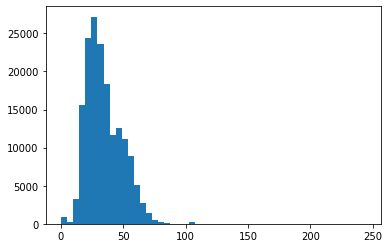

In [103]:
# Age describe

users_df['age'].describe()
plt.hist(users_df['age'], bins = 50)

count    278858.000000
mean         33.641678
std          10.625783
min           5.000000
25%          29.000000
50%          32.000000
75%          35.000000
max          99.000000
Name: age, dtype: float64

(array([3.43100e+03, 3.43140e+04, 1.63815e+05, 3.17850e+04, 2.24240e+04,
        1.64280e+04, 5.07100e+03, 1.37700e+03, 1.51000e+02, 6.20000e+01]),
 array([ 5. , 14.4, 23.8, 33.2, 42.6, 52. , 61.4, 70.8, 80.2, 89.6, 99. ]),
 <a list of 10 Patch objects>)

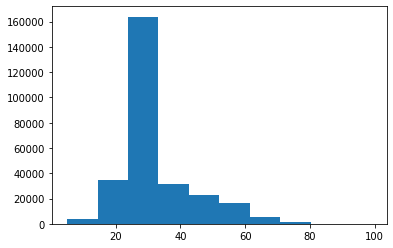

In [107]:
users_df.loc[(users_df.age>99) | (users_df.age<5),'age'] = np.nan
users_df.age = users_df.age.fillna(users_df.age.median()) # fillna with median value
users_df['age'].describe()
plt.hist(users_df['age'], bins = 10)

In [108]:
# Ratings dataframe
ratings_df.isnull().sum()


user_id    0
isbn       0
rating     0
dtype: int64

In [110]:
# Books dataframe

books_df.isnull().sum()
books_df.loc[books_df.publisher.isnull(),:]

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
img_s                  0
img_m                  0
img_l                  0
dtype: int64

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
128897,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129044,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [111]:
# Fill NaN by searching on the Internet
books_df.loc[books_df.isbn=='193169656X','publisher']='Mundania Press LLC'  
books_df.loc[books_df.isbn=='1931696993','publisher']='Novelbooks Incorporated'

In [112]:
books_df.loc[books_df.book_author.isnull(),:]

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
187701,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [114]:
# Fill NaN by searching on the Internet
books_df.loc[books_df.isbn=='9627982032','book_author']='Larissa Anne Downe'

In [117]:
books_df['year_of_publication'].describe()

count    271379.000000
mean       1959.756050
std         258.011363
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: year_of_publication, dtype: float64

In [121]:
books_df.loc[(books_df.year_of_publication==0)|(books_df.year_of_publication>2023) ,'year_of_publication' ] = np.nan
books_df.year_of_publication = books_df.year_of_publication.fillna(round(books_df.year_of_publication.median())) # Fillnan with median value